# Visualization of the results

In this tutorial, we demonstrate the visualization functionalities based on our 1st reconstruction.
Note that these functionalities are still in a working-in-process, preliminary stage.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import os
import numpy as np
import pandas as pd
import xarray as xr

### Plot the whole loaded proxy database

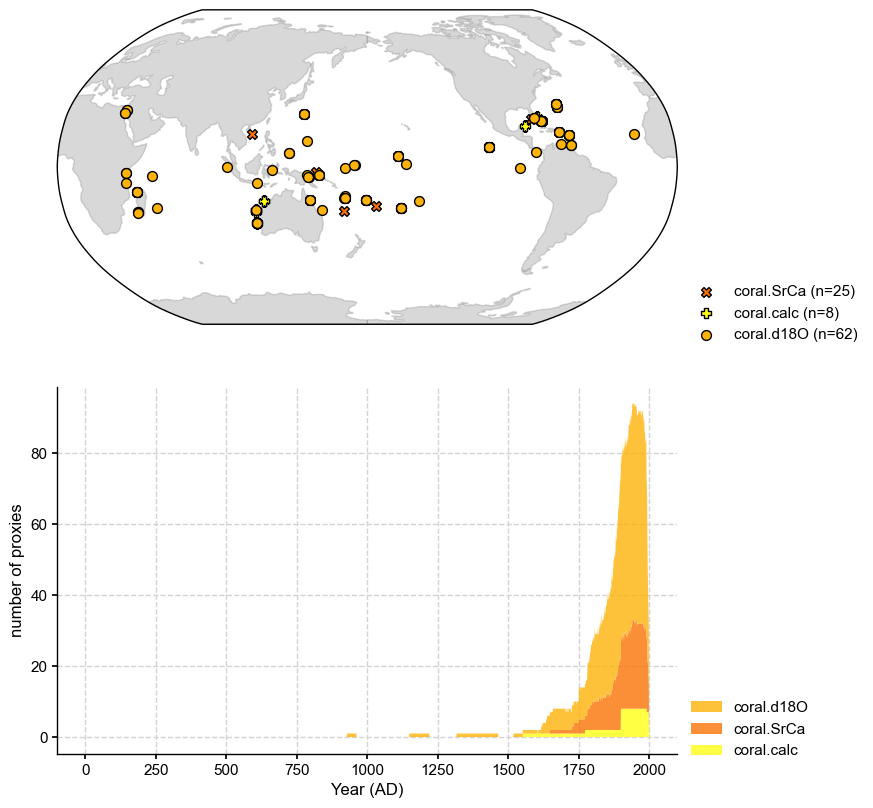

In [2]:
job_dirpath = './testcases/PAGES2k_CCSM4_GISTEMP/recon/'
job = pd.read_pickle(os.path.join(job_dirpath, 'job.pkl'))
fig, ax = job.proxydb.plot()

### Plot a specific proxy record

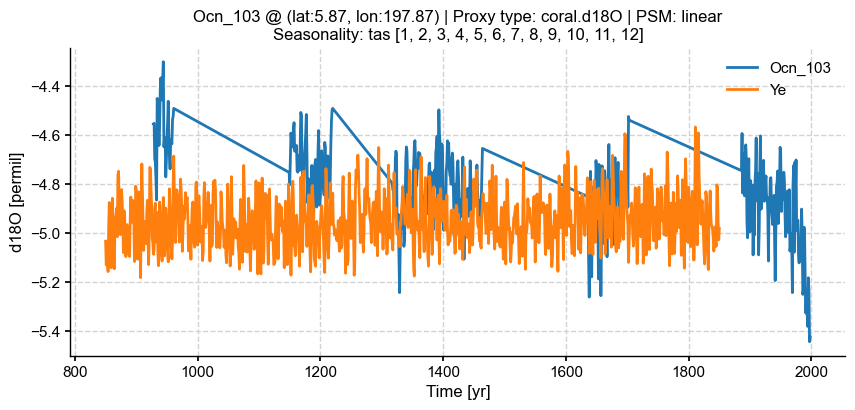

In [3]:
fig, ax = job.proxydb.records['Ocn_103'].plot()

### Plot a prior/obs field

/Users/fzhu/Github/LMRt/LMRt/visual.py:218: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect, extend=extend,


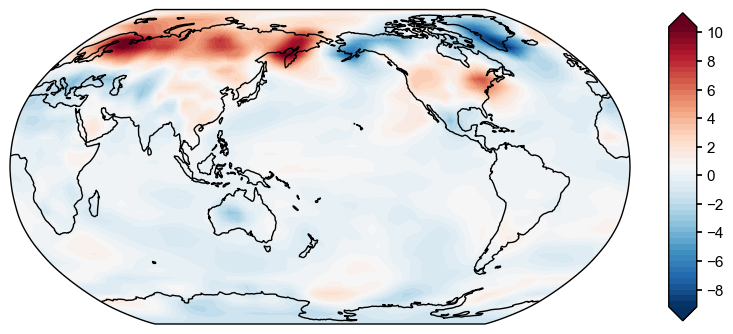

In [4]:
fig, ax = job.prior.fields['tas'].plot(idx_t=-1)

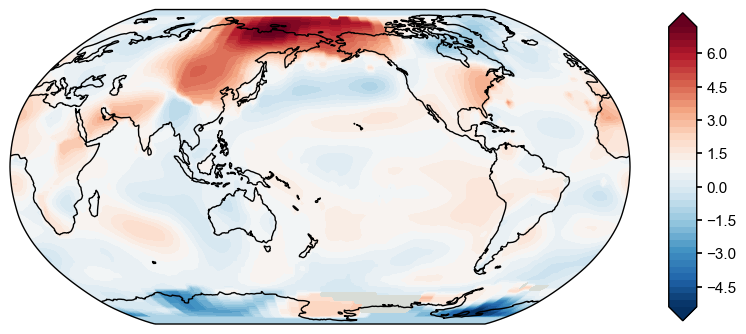

In [5]:
fig, ax = job.obs.fields['tas'].plot(idx_t=-1)

### Plot the reconstructed series and fields

In [6]:
res = LMRt.ReconRes(job_dirpath, verbose=True)

recon_paths: ['./testcases/PAGES2k_CCSM4_GISTEMP/recon/job_r00_recon.nc']
idx_paths: ['./testcases/PAGES2k_CCSM4_GISTEMP/recon/job_r00_idx.pkl']
job_path: ./testcases/PAGES2k_CCSM4_GISTEMP/recon/job.pkl


In [7]:
res.get_vars(['tas', 'nino3.4'], verbose=True)

LMRt: res.get_var() >>> loading variable: tas
LMRt: res.get_var() >>> loading variable: nino3.4
LMRt: res.get_var() >>> res.vars filled w/ varnames: ['tas', 'nino3.4'] and "year | lat | lon"


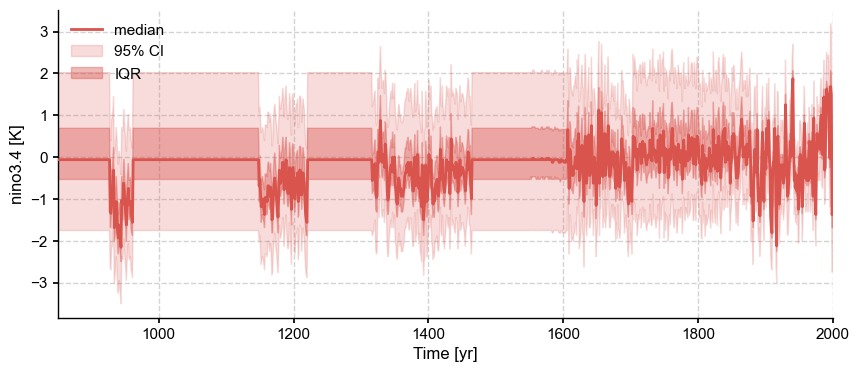

In [8]:
fig, ax = res.vars['nino3.4'].plot_envelope(xlim=[850, 2000])

/Users/fzhu/Github/LMRt/LMRt/visual.py:218: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect, extend=extend,


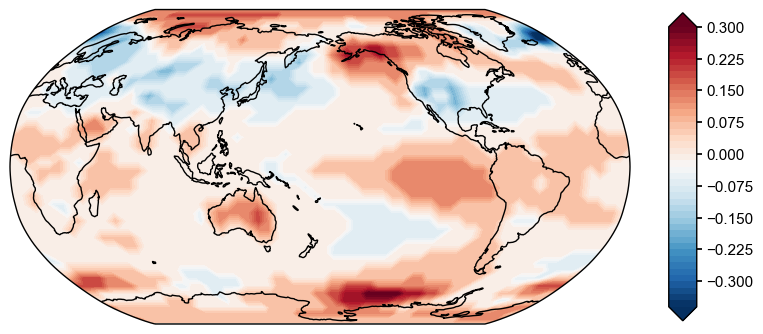

In [9]:
fig, ax = res.vars['tas'].field_list[0].plot()

### Plot validation of the reconstructed field against a target field

In [10]:
ds = LMRt.Dataset().load_nc(
    {'tas':'./testcases/PAGES2k_CCSM4_GISTEMP/data/obs/tas_sfc_Amon_20CR_185101-201112.nc'},
    anom_period=[1951, 1980],
    varname_dict={'tas': 'tas'}
)
target_fd = ds.fields['tas']
target_fd = target_fd.seasonalize(list(range(1, 13)))

Calculating metric: corr: 100%|██████████| 42/42 [00:23<00:00,  1.80it/s]
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fzhu/Github/LMRt/LMRt/visual.py:218: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect, extend=extend,


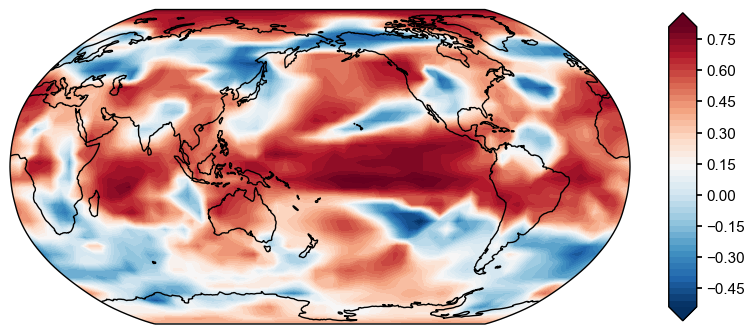

In [11]:
corr_fd = res.vars['tas'].validate(target_fd, stat='corr')
fig, ax = corr_fd.plot()

Calculating metric: R2: 100%|██████████| 42/42 [00:29<00:00,  1.42it/s]
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fzhu/Github/LMRt/LMRt/visual.py:218: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect, extend=extend,


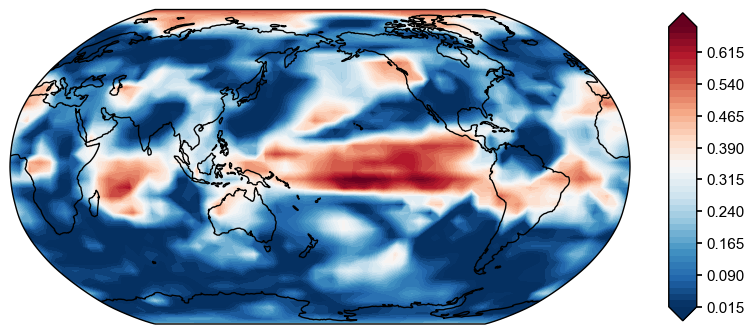

In [12]:
R2_fd = res.vars['tas'].validate(target_fd, stat='R2')
fig, ax = R2_fd.plot()

Calculating metric: CE: 100%|██████████| 42/42 [00:02<00:00, 18.36it/s]


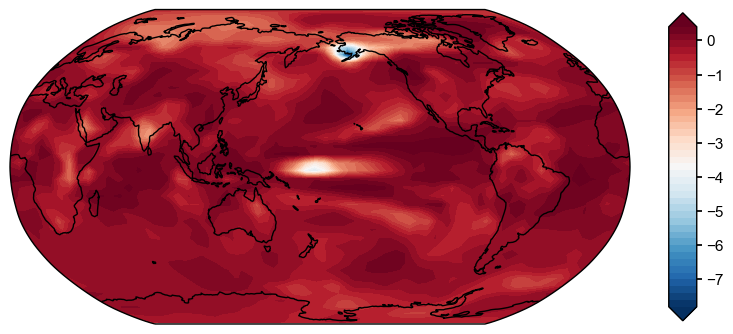

In [13]:
ce_fd = res.vars['tas'].validate(target_fd, stat='CE')
fig, ax = ce_fd.plot()

### Plot validation of the reconstructed series against a target field/series

Calculating metric: corr: 100%|██████████| 91/91 [03:11<00:00,  2.11s/it]
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fzhu/Github/LMRt/LMRt/visual.py:218: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect, extend=extend,


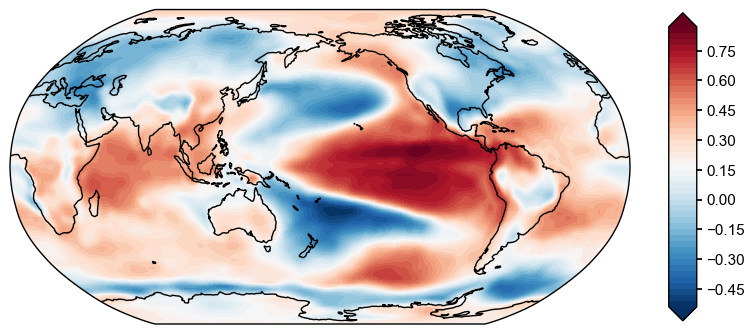

In [14]:
corr_nino34_fd = res.vars['nino3.4'].validate(target_fd, stat='corr')
fig, ax = corr_nino34_fd.plot()

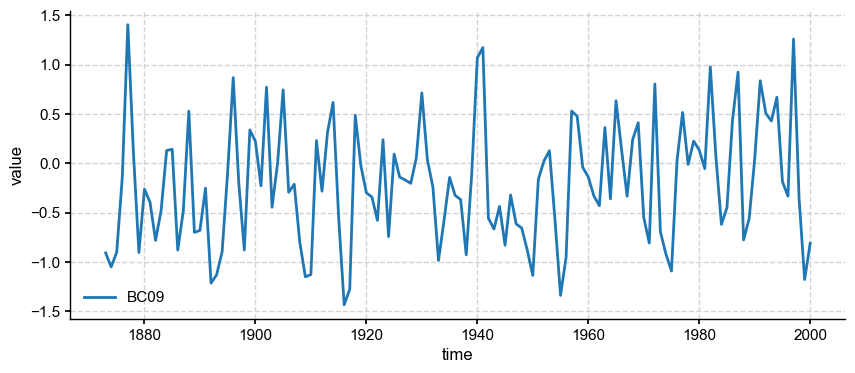

In [15]:
from scipy.io import loadmat

data = loadmat('./testcases/PAGES2k_CCSM4_GISTEMP/data/obs/NINO34_BC09.mat')
syr, eyr = 1873, 2000
nyr = eyr-syr+1
nino34 = np.zeros(nyr)
for i in range(nyr):
    nino34[i] = np.mean(data['nino34'][i*12:12+i*12])
    
target_series = LMRt.Series(time=np.arange(syr, eyr+1), value=nino34, label='BC09')
fig, ax = target_series.plot()

LMRt: res.ReconSeries.validate() >>> valid_period = [1880, 2000]


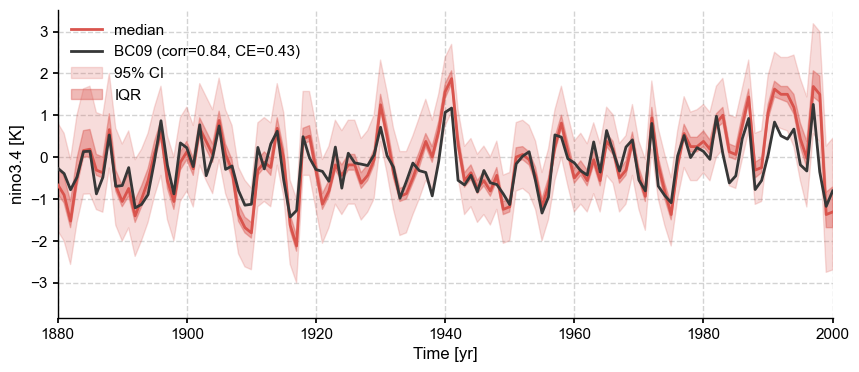

In [16]:
fig, ax = res.vars['nino3.4'].validate(target_series, verbose=True).plot(xlim=[1880, 2000])

### Plot validation of the reconstructed field against the whole proxy database or a single proxy record

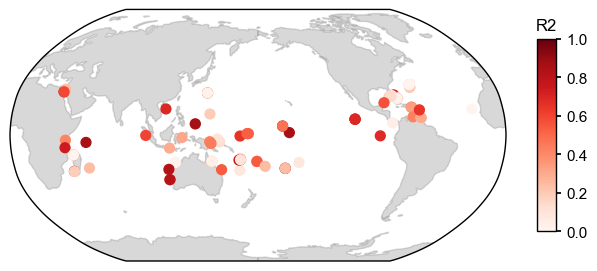

In [17]:
fig, ax = res.vars['tas'].validate(job.proxydb, stat='R2').plot()

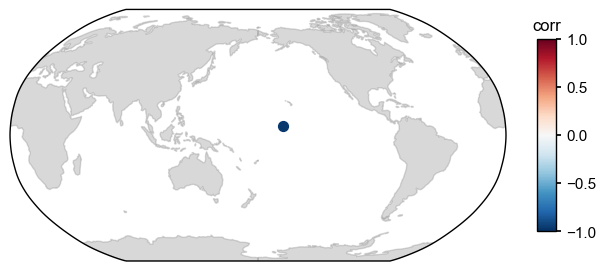

In [18]:
fig, ax = res.vars['tas'].validate(job.proxydb.records['Ocn_103'], stat='corr').plot()